EDA of QUORA Question pair similarity problem

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import string

import re
from nltk.corpus import stopwords
!pip install distance
import distance
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.3/180.3 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for distance: filename=Distance-0.1.3-py3-none-any.whl size=16256 sha256=03a39fcc3a9818762cacf36d83da760c1c7afec3817f32639f705c8cbcca3472
  Stored in directory: /root/.cache/pip/wheels/fb/cd/9c/3ab5d666e3bcacc58900b10959edd3816cc9557c7337986322
Successfully built distance


In [ ]:
df = pd.read_csv('questions.csv')

In [ ]:
df.shape

(404351, 6)

In [ ]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


Here,
in is_duplicate feature, 0 -> No
1 -> Yes

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404351 entries, 0 to 404350
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404351 non-null  int64 
 1   qid1          404351 non-null  int64 
 2   qid2          404351 non-null  int64 
 3   question1     404350 non-null  object
 4   question2     404349 non-null  object
 5   is_duplicate  404351 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In **question1** feature we have 1 null object.
In **question2** feature we have 2 null objects.

<Axes: xlabel='is_duplicate'>

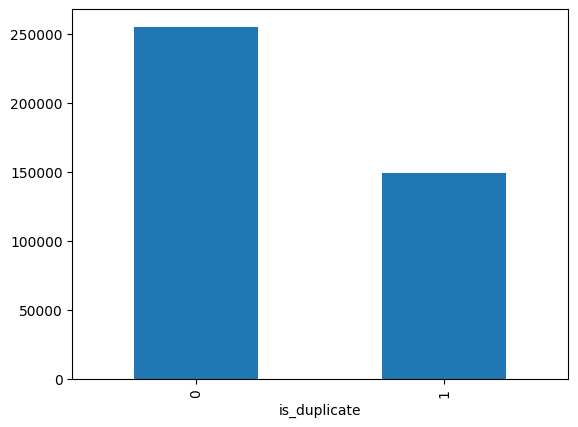

In [ ]:
df['is_duplicate'].value_counts().plot.bar()

In [ ]:
x = df.loc[df['is_duplicate'] == 0, 'id'].count()
y = df.loc[df['is_duplicate'] == 1, 'id'].count()
z = df['id'].count()
y = (y/z)*100
x = (x/z)*100

In [ ]:
print("Pecentage of similar pair of questions are {}".format(y))
print("Pecentage of non similar pair of questions are {}".format(x))

Pecentage of similar pair of questions are 36.92484994472624
Pecentage of non similar pair of questions are 63.07515005527375


In [ ]:
qids = pd.Series(df['question1'].astype(str).tolist() + df['question2'].astype(str).tolist())
unique_qs = len(np.unique(qids))
print("Total no. of unique questions are : {}".format(unique_qs))

qs_morethan_onetime = np.sum(qids.value_counts() > 1)
print("Total no. of questions that appear more than once are : {}".format(qs_morethan_onetime))

print("Max number of time a single question is repeated : {}".format(np.max(qids.value_counts())))
q_vals = qids.value_counts()
q_vals = q_vals.values

Total no. of unique questions are : 537388
Total no. of questions that appear more than once are : 111894
Max number of time a single question is repeated : 161


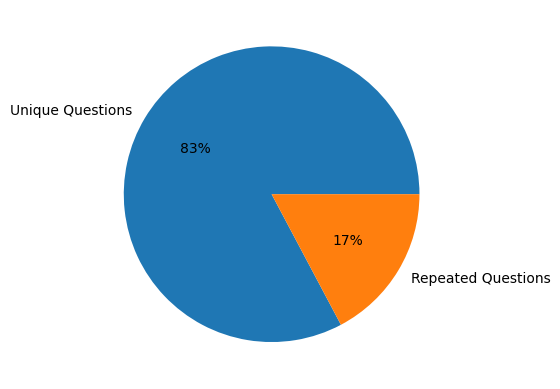

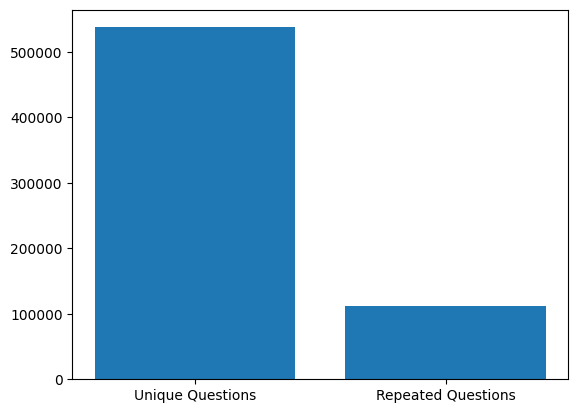

In [ ]:
x = ['Unique Questions', 'Repeated Questions']
y = [unique_qs, qs_morethan_onetime]

plt.pie(y, labels = x, autopct = '%1.0f%%')
plt.show()

plt.bar(x, y)
plt.show()

In [ ]:
duplicate_rows = df[df.duplicated(subset=['qid1', 'qid2', 'is_duplicate'], keep=False)]
print(f"Number of duplicate rows: {len(duplicate_rows)}")
duplicate_rows

Number of duplicate rows: 4


,id,qid1,qid2,question1,question2,is_duplicate
203253,203253,401038,401039,How does it feel to be an Indian?,How does it feel being an indian?,1
238815,238815,470424,470425,Which flavour has been considered as the best ...,Which school of economic thought is considered...,0
297202,297202,401038,401039,"I have not been running for last 10 days, and ...","I have not been running for last 10 days, and ...",1
336568,336568,470424,470425,When was 2011 5th Global Shipping Summit?,Where is the 2011 5th Global Shipping Summit?,0


In [ ]:
pairs_duplicates = df[['qid1', 'qid2','is_duplicate']].groupby(['qid1','qid2','is_duplicate']).size().reset_index()
y = (pairs_duplicates).shape[0] - df.shape[0]
print(y)


-2


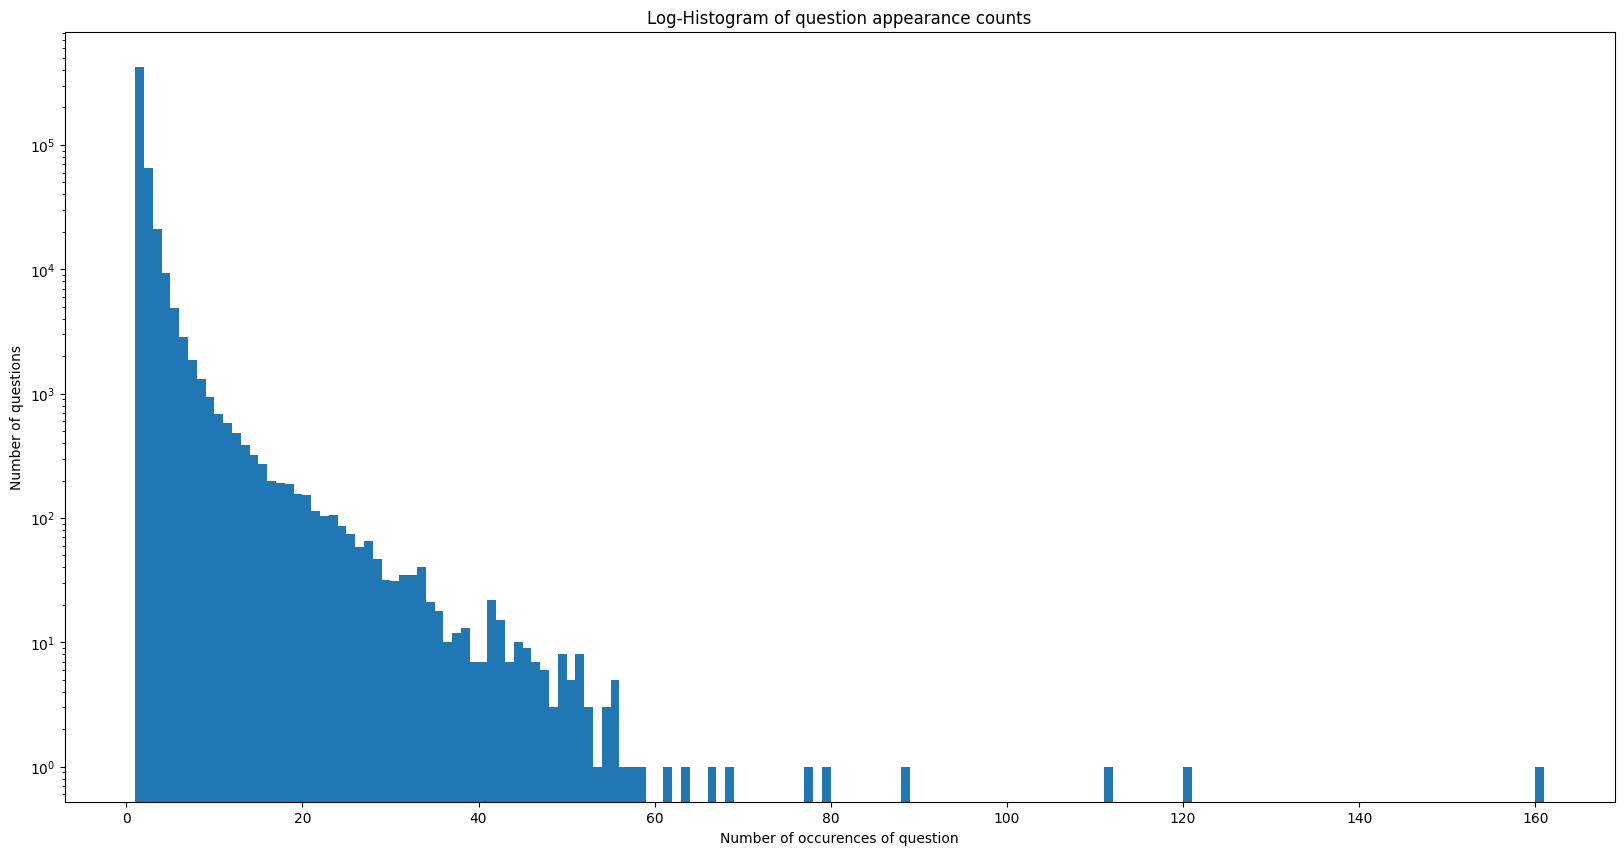

In [ ]:
plt.figure(figsize=(20, 10))
plt.hist(qids.value_counts(),bins=160)
plt.yscale('log', nonpositive = 'clip')
plt.title('Log-Histogram of question appearance counts')
plt.xlabel('Number of occurences of question')
plt.ylabel('Number of questions')
plt.show()

In [ ]:
nan_rows = df[df.isnull().any(axis=1)]
print(nan_rows)

            id    qid1    qid2                         question1  \
105796  105796  209841  209842    How can I develop android app?   
201871  201871  398348  398349  How can I create an Android app?   
363416  363416  711434  711435                               NaN   

                                                question2  is_duplicate  
105796                                                NaN             0  
201871                                                NaN             0  
363416  My Chinese name is Haichao Yu. What English na...             0  


In [ ]:
df = df.fillna('')
nan_rows = df[df.isnull().any(axis=1)]
print(nan_rows)

Empty DataFrame
Columns: [id, qid1, qid2, question1, question2, is_duplicate]
Index: []


# **Basic Feature Extraction (Before cleaning)**
let us now construct a few feature like:


*   freq_qid1 = Frequency of qid1's
*   freq_qid2 = Frequency of qid2's
*   q1len = length of q1
*   q2len = length of q2
*   q1_n_words = Number of words in question 1
*   q2_n_words = Number of words in question 2
*   word_common = Number of common unique words in question 1 and question 2
*   word_total = Total num of words in question 1 + total num of words in question 2
*   word_share = word_common / word total
*   freq_q1+freq_q2 = sum total of frequency of qid1 and qid2
*   freq_q1-freq_q2 = absolute difference of frequency of qid1 and qid2

In [ ]:
# Punctuation Removal
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

# HTML Tags removal
def remove_html(x):
    return BeautifulSoup(x, 'lxml').get_text()

# Lowercase Alphabets
def lower(text):
    return text.lower()

In [ ]:
df['question1'] = df['question1'].apply(lambda x: remove_punctuation(x))
df['question2'] = df['question2'].apply(lambda x: remove_punctuation(x))

df['question1'] = df['question1'].apply(lambda x: remove_html(x))
df['question2'] = df['question2'].apply(lambda x: remove_html(x))

df['question1'] = df['question1'].apply(lambda x: lower(x))
df['question2'] = df['question2'].apply(lambda x: lower(x))

In [ ]:
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
processed_q1 = []
for i in df['question1']:
  w = []
  i = i.split(" ")
  for word in i:
    w.append(word)
  processed_q1.append(w)

In [ ]:
processed_q1[2]

['how',
 'can',
 'i',
 'increase',
 'the',
 'speed',
 'of',
 'my',
 'internet',
 'connection',
 'while',
 'using',
 'a',
 'vpn']

In [ ]:
processed_q2 = []
for i in df['question2']:
  w = []
  i = i.split(" ")
  for word in i:
    w.append(word)
  processed_q2.append(w)

In [ ]:
processed_q2[2]

['how',
 'can',
 'internet',
 'speed',
 'be',
 'increased',
 'by',
 'hacking',
 'through',
 'dns']

In [ ]:
for i, w in enumerate(processed_q1):
    df.loc[i, 'q1_n_words'] = len(w)

In [ ]:
for i, w in enumerate(processed_q2):
    df.loc[i, 'q2_n_words'] = len(w)

In [ ]:
for i, w in enumerate(processed_q1):
    set1 = set(w)
    set2 = set(processed_q2[i])
    df.loc[i, 'word_common'] = len(set1.intersection(set2))

In [ ]:
for i, w in enumerate(processed_q1):
    set1 = set(w)
    set2 = set(processed_q2[i])
    df.loc[i, 'word_total'] = len(set1.union(set2))

In [ ]:
for i in range(df.shape[0]):
  df.loc[i, 'q1len'] = len(df['question1'][i])

In [ ]:
for i in range(df.shape[0]):
  df.loc[i, 'q2len'] = len(df['question2'][i])

In [ ]:
df['word_share'] = df['word_common']/df['word_total']

In [ ]:
qids = pd.Series(df['question1'].astype(str).tolist() + df['question2'].astype(str).tolist())

In [ ]:
x = qids.value_counts()
for i,w in enumerate(df['question1']):
  df.loc[i, 'freq_qid1'] = x[('{}'.format(w))]
for i,w in enumerate(df['question2']):
  df.loc[i, 'freq_qid2'] = x[('{}'.format(w))]

In [ ]:
df['freq_q1+freq_q2'] = df['freq_qid1'] + df['freq_qid2']
df['freq_q1-freq_q2'] = abs(df['freq_qid1'] - df['freq_qid2'])

In [ ]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_n_words,q2_n_words,word_common,word_total,q1len,q2len,word_share,freq_qid1,freq_qid2,freq_q1+freq_q2,freq_q1-freq_q2
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,14.0,12.0,11.0,12.0,65.0,56.0,0.916667,1.0,1.0,2.0,0.0
1,1,3,4,what is the story of kohinoor kohinoor diamond,what would happen if the indian government sto...,0,8.0,13.0,4.0,14.0,46.0,83.0,0.285714,4.0,2.0,6.0,2.0
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,14.0,10.0,4.0,20.0,72.0,58.0,0.200000,1.0,1.0,2.0,0.0
3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when math2324math is divide...,0,11.0,9.0,0.0,19.0,48.0,55.0,0.000000,1.0,1.0,2.0,0.0
4,4,9,10,which one dissolve in water quikly sugar salt ...,which fish would survive in salt water,0,13.0,7.0,4.0,16.0,73.0,38.0,0.250000,3.0,1.0,4.0,2.0


In [ ]:
df.shape

(404351, 17)

In [ ]:
x = min(df['q1len'])
y = min(df['q2len'])
w = df[df['q1len'] == min(df['q1len'])]['id'].count()
g = df[df['q2len'] == min(df['q2len'])]['id'].count()
print('Minimun length of the questions in question1 : ',x)
print('Minimun length of the questions in question2 : ',y)
print('Number of questions with minimum length [question1] : ',w)
print('Number of questions with minimum length [question2] : ',g)

Minimun length of the questions in question1 :  0.0
Minimun length of the questions in question2 :  0.0
Number of questions with minimum length [question1] :  13
Number of questions with minimum length [question2] :  4


Feature : Word_share

<ipython-input-36-7c9741b98434>:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-36-7c9741b98434>:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




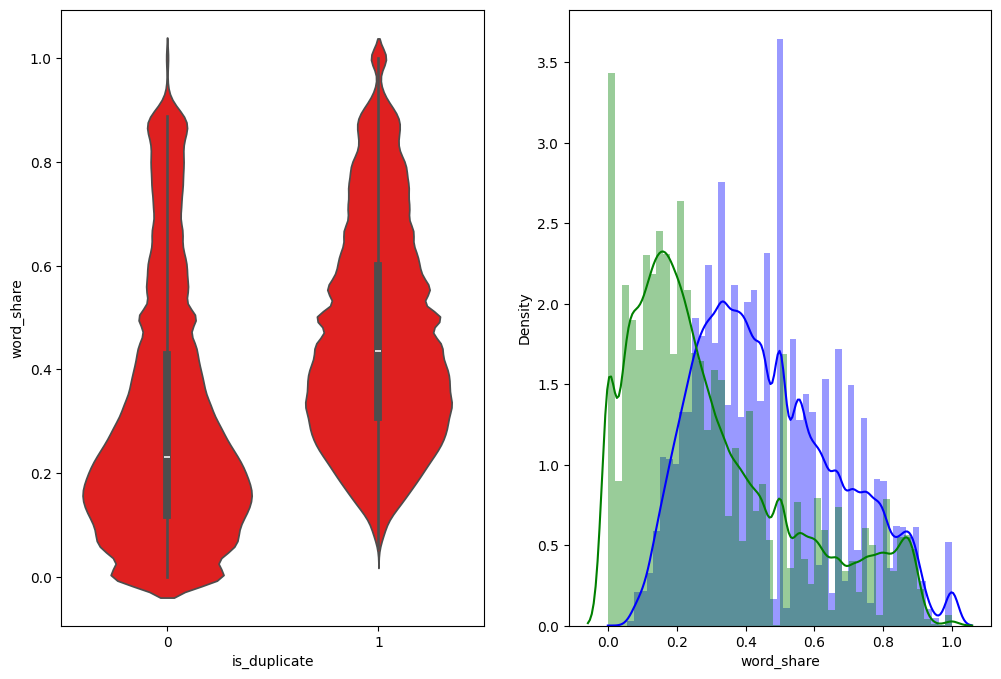

In [ ]:
x = 'is_duplicate'
y = 'word_share'
plt.figure(figsize=(12, 8))
plt.subplot(1,2,1)
sns.violinplot(x=x, y=y, data=df, color='r')
plt.subplot(1,2,2)
sns.distplot(df[df[x]== 1.0][y], label="1", color='b')
sns.distplot(df[df[x]== 0.0][y], label = "0",color='g')
plt.show()

<ipython-input-37-9214d1020e76>:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-37-9214d1020e76>:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




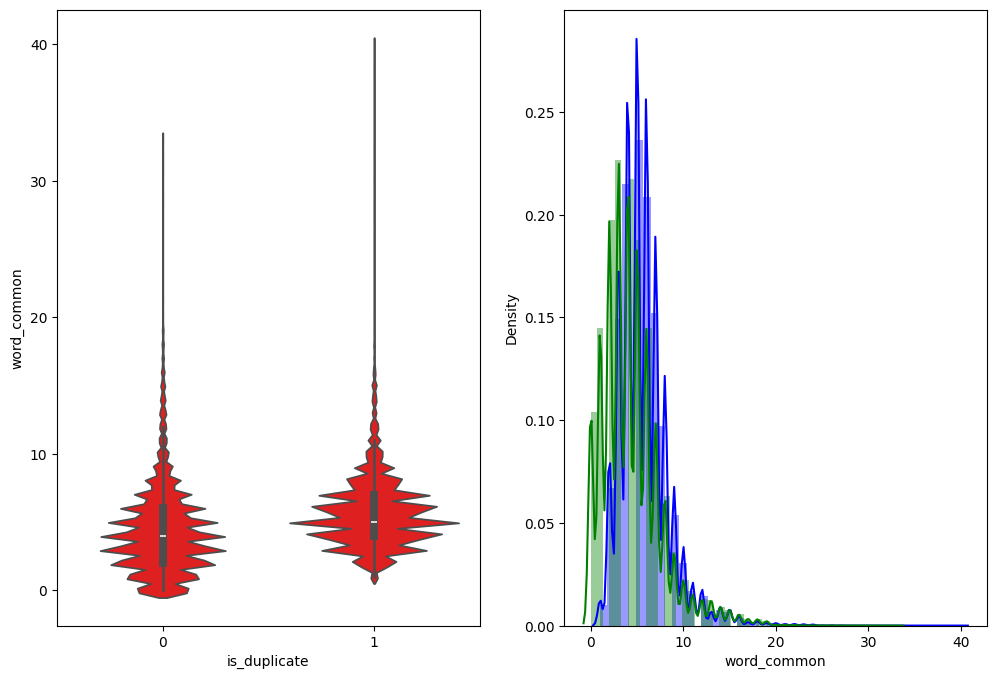

In [ ]:
x = 'is_duplicate'
y = 'word_common'
plt.figure(figsize=(12, 8))
plt.subplot(1,2,1)
sns.violinplot(x=x, y=y, data=df, color='r')
plt.subplot(1,2,2)
sns.distplot(df[df[x]== 1.0][y], label="1", color='b')
sns.distplot(df[df[x]== 0.0][y], label = "0",color='g')
plt.show()

In [ ]:
df.to_csv('output.csv', index=False)